In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv("Hazrat Shahjalal International Airport Flight Delay Dataset  2022.csv")

In [4]:
df.head()

,Date,DayOfTheWeek,FlightNo,Airline,Airline IATA Code,Airline ICAO Code,DestinationCity,DestinationAirportIATACode,DestinationAirportICAOCode,FlightType,Scheduled Departure Local Time,Scheduled Departure UTC,Actual Departure,Delay Duration Local(minutes),Delay Status,Unnamed: 15
0,2022-01-01,Saturday,901,NovoAir,VQ,NVQ,Chittagong,CGP,VGEG,Domestic,01 Jan 7:30,01 Jan 1:30,01 Jan 7:57,27,1,NaN
1,2022-01-01,Saturday,611,Biman Bangladesh Airlines,BG,BBC,Chittagong,CGP,VGEG,Domestic,01 Jan 7:45,01 Jan 1:45,01 Jan 8:31,46,1,NaN
2,2022-01-01,Saturday,493,Biman Bangladesh Airlines,BG,BBC,Saidpur,SPD,VGSD,Domestic,01 Jan 7:45,01 Jan 1:45,01 Jan 12:04,259,1,NaN
3,2022-01-01,Saturday,4091,Biman Bangladesh Airlines,BG,BBC,Kolkata,CCU,VECC,International,01 Jan 8:05,01 Jan 2:05,01 Jan 8:22,17,0,NaN
4,2022-01-01,Saturday,307,US-Bangla Airlines,BS,UBG,Singapore,SIN,WSSS,International,01 Jan 8:15,01 Jan 2:15,01 Jan 8:27,12,0,NaN


In [5]:
df.shape

(31577, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31577 entries, 0 to 31576
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            31577 non-null  object 
 1   DayOfTheWeek                    31577 non-null  object 
 2   FlightNo                        31577 non-null  object 
 3   Airline                         31577 non-null  object 
 4   Airline IATA Code               31577 non-null  object 
 5   Airline ICAO Code               31576 non-null  object 
 6   DestinationCity                 31577 non-null  object 
 7   DestinationAirportIATACode      31577 non-null  object 
 8   DestinationAirportICAOCode      31576 non-null  object 
 9   FlightType                      31577 non-null  object 
 10  Scheduled Departure Local Time  31577 non-null  object 
 11  Scheduled Departure UTC         31577 non-null  object 
 12  Actual Departure                

In [88]:
df.drop(columns=["Unnamed: 15", "FlightNo", "Scheduled Departure Local Time",
                 "Scheduled Departure UTC", "Actual Departure"], inplace=True)

In [89]:
df.head()

,Date,DayOfTheWeek,Airline,Airline IATA Code,Airline ICAO Code,DestinationCity,DestinationAirportIATACode,DestinationAirportICAOCode,FlightType,Delay Duration Local(minutes),Delay Status
0,2022-01-01,Saturday,NovoAir,VQ,NVQ,Chittagong,CGP,VGEG,Domestic,27,1
1,2022-01-01,Saturday,Biman Bangladesh Airlines,BG,BBC,Chittagong,CGP,VGEG,Domestic,46,1
2,2022-01-01,Saturday,Biman Bangladesh Airlines,BG,BBC,Saidpur,SPD,VGSD,Domestic,259,1
3,2022-01-01,Saturday,Biman Bangladesh Airlines,BG,BBC,Kolkata,CCU,VECC,International,17,0
4,2022-01-01,Saturday,US-Bangla Airlines,BS,UBG,Singapore,SIN,WSSS,International,12,0


In [90]:
df.isnull().sum()

Date                             0
DayOfTheWeek                     0
Airline                          0
Airline IATA Code                0
Airline ICAO Code                1
DestinationCity                  0
DestinationAirportIATACode       0
DestinationAirportICAOCode       1
FlightType                       0
Delay Duration Local(minutes)    0
Delay Status                     0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

Date                             0
DayOfTheWeek                     0
Airline                          0
Airline IATA Code                0
Airline ICAO Code                0
DestinationCity                  0
DestinationAirportIATACode       0
DestinationAirportICAOCode       0
FlightType                       0
Delay Duration Local(minutes)    0
Delay Status                     0
dtype: int64

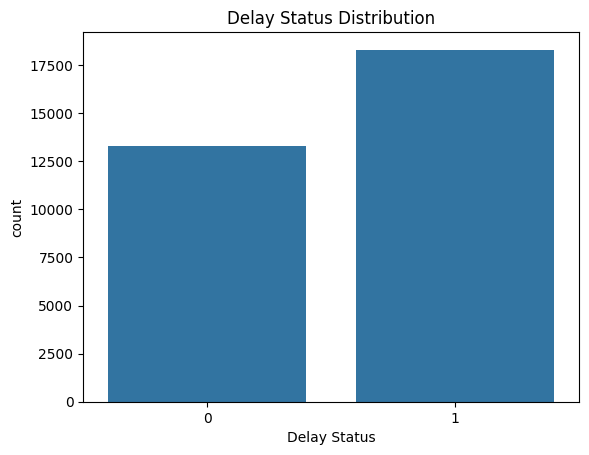

In [93]:
sns.countplot(x="Delay Status", data=df)
plt.title("Delay Status Distribution")
plt.show()

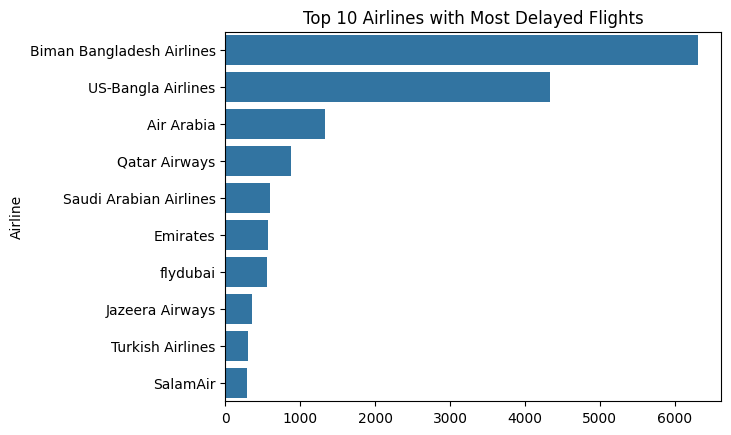

In [94]:
top_airlines = df[df["Delay Status"] == 1]["Airline"].value_counts().head(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index)
plt.title("Top 10 Airlines with Most Delayed Flights")
plt.show()

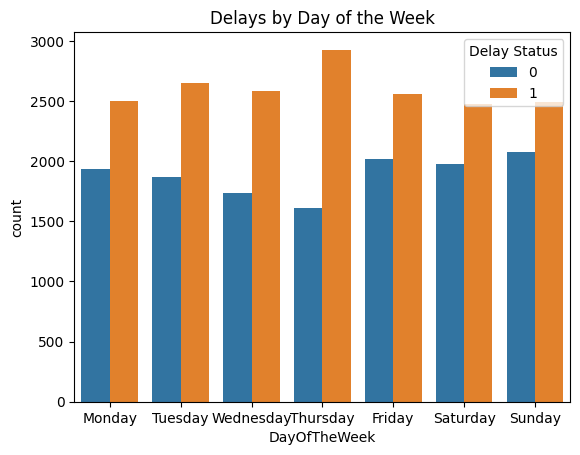

In [95]:
sns.countplot(data=df, x="DayOfTheWeek", hue="Delay Status", order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Delays by Day of the Week")
plt.show()

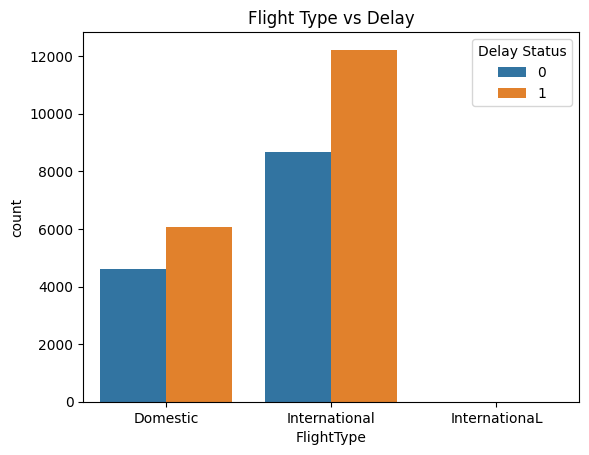

In [96]:
sns.countplot(data=df, x="FlightType", hue="Delay Status")
plt.title("Flight Type vs Delay")
plt.show()

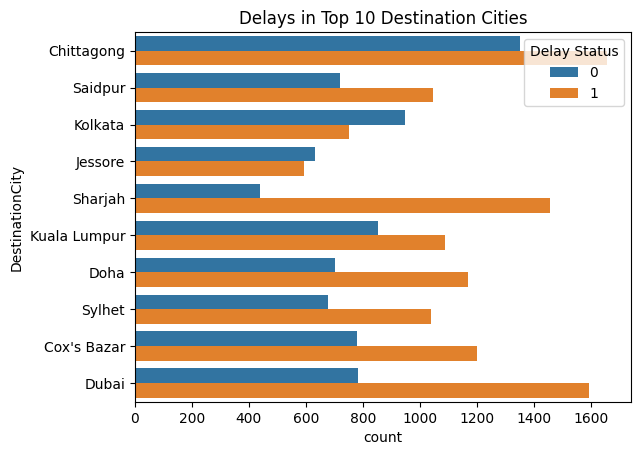

In [97]:
top_dest = df["DestinationCity"].value_counts().head(10).index
sns.countplot(data=df[df["DestinationCity"].isin(top_dest)],
              y="DestinationCity", hue="Delay Status")
plt.title("Delays in Top 10 Destination Cities")
plt.show()

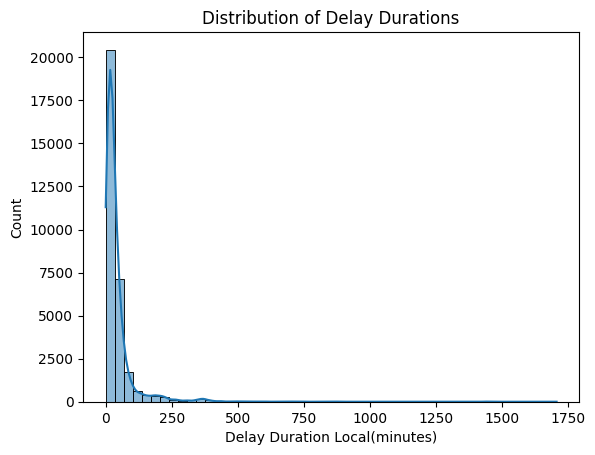

In [98]:
sns.histplot(data=df, x="Delay Duration Local(minutes)", bins=50, kde=True)
plt.title("Distribution of Delay Durations")
plt.show()

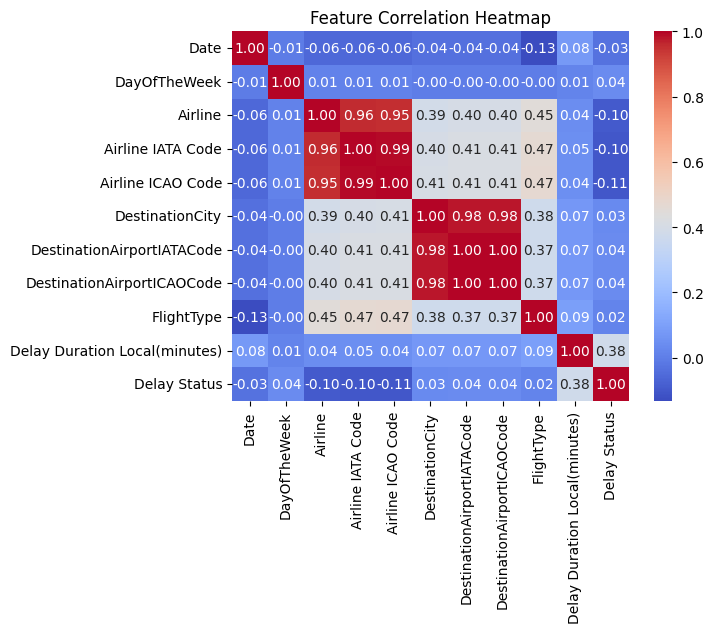

In [99]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include="object"):
    df_encoded[col] = pd.factorize(df_encoded[col])[0]
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [100]:
label_encoders = {}
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [101]:
X = df.drop("Delay Status", axis=1)
y = df["Delay Status"]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(
        objective='binary', metric='binary_logloss', learning_rate=0.05,
        num_leaves=100, max_depth=7, min_data_in_leaf=20,
        feature_fraction=0.8, bagging_fraction=0.8, bagging_freq=5
    )
}

In [105]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = classification_report(y_test, preds, output_dict=True)
    print(f"\n📊 {name} Report:\n", classification_report(y_test, preds))


📊 RandomForest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2681
           1       1.00      1.00      1.00      3634

    accuracy                           1.00      6315
   macro avg       1.00      1.00      1.00      6315
weighted avg       1.00      1.00      1.00      6315


📊 XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2681
           1       1.00      1.00      1.00      3634

    accuracy                           1.00      6315
   macro avg       1.00      1.00      1.00      6315
weighted avg       1.00      1.00      1.00      6315



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [02:07:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 LightGBM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2681
           1       1.00      1.00      1.00      3634

    accuracy                           1.00      6315
   macro avg       1.00      1.00      1.00      6315
weighted avg       1.00      1.00      1.00      6315



In [106]:
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
dl_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50,
             batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/50


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7619 - loss: 0.4586 - val_accuracy: 0.9671 - val_loss: 0.0911
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9502 - loss: 0.1194 - val_accuracy: 0.9818 - val_loss: 0.0550
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9700 - loss: 0.0742 - val_accuracy: 0.9844 - val_loss: 0.0424
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9751 - loss: 0.0585 - val_accuracy: 0.9822 - val_loss: 0.0400
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9772 - loss: 0.0547 - val_accuracy: 0.9836 - val_loss: 0.0389
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9841 - loss: 0.0409 - val_accuracy: 0.9954 - val_loss: 0.0233
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9843 - loss: 0.0371 - val_accuracy: 0.9921 - val_loss: 0.0232
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9866 - loss: 0.0328 - val_accuracy: 0.9937 - val_

In [107]:
dl_preds = (dl_model.predict(X_test_scaled) > 0.5).astype("int32")
results["DeepLearning"] = classification_report(y_test, dl_preds, output_dict=True)
print("\n📊 Deep Learning Report:\n", classification_report(y_test, dl_preds))

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step

📊 Deep Learning Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2681
           1       0.99      1.00      0.99      3634

    accuracy                           0.99      6315
   macro avg       0.99      0.99      0.99      6315
weighted avg       0.99      0.99      0.99      6315



198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


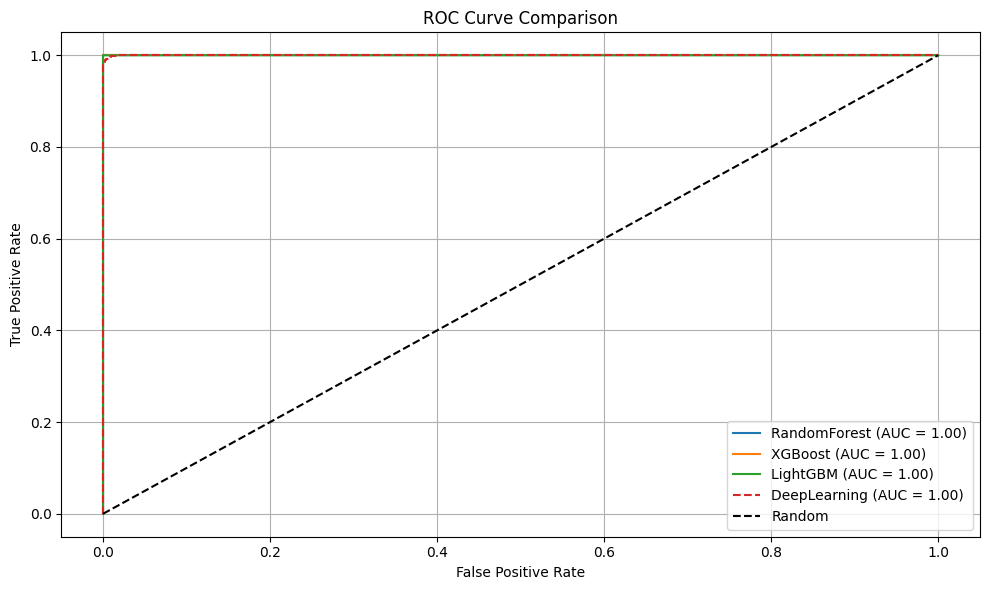

In [108]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

y_prob_dl = dl_model.predict(X_test_scaled).ravel()
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_prob_dl)
plt.plot(fpr_dl, tpr_dl, '--', label=f"DeepLearning (AUC = {auc(fpr_dl, tpr_dl):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/100


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


632/632 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7740 - loss: 0.4463 - val_accuracy: 0.9669 - val_loss: 0.0826 - learning_rate: 0.0010
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9404 - loss: 0.1387 - val_accuracy: 0.9727 - val_loss: 0.0705 - learning_rate: 0.0010
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1203 - val_accuracy: 0.9711 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.0963 - val_accuracy: 0.9875 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.0873 - val_accuracy: 0.9871 - val_loss: 0.0364 - learning_rate: 0.0010
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.0756 - val_accuracy: 0.9861 - val_loss: 0.0328 - learning_rate: 0.0010
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0741 - val_a

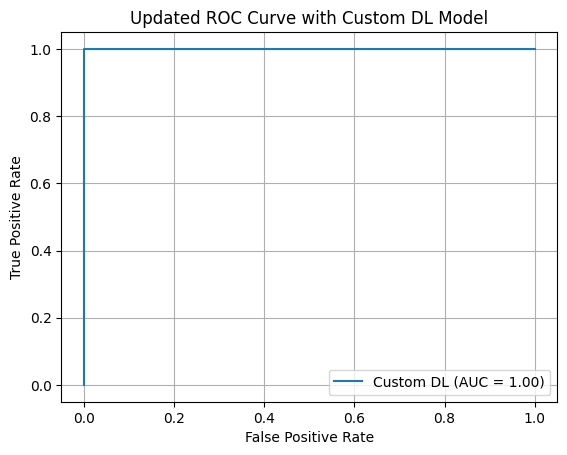

In [109]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

# ===============================
# 🧠 CUSTOM DEEP LEARNING MODEL
# ===============================
custom_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training
history = custom_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluation
custom_preds = (custom_model.predict(X_test_scaled) > 0.5).astype("int32")
print("\n📊 Custom Deep Learning Report:\n", classification_report(y_test, custom_preds))

# ROC for custom model
custom_probs = custom_model.predict(X_test_scaled).ravel()
fpr_c, tpr_c, _ = roc_curve(y_test, custom_probs)
plt.plot(fpr_c, tpr_c, label=f"Custom DL (AUC = {auc(fpr_c, tpr_c):.2f})")

plt.legend()
plt.grid(True)
plt.title("Updated ROC Curve with Custom DL Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [110]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier

# Initialize all models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting ensemble with deep learning
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm),
    
], voting='soft')

ensemble.fit(X_train_scaled, y_train)
ens_preds = ensemble.predict(X_test_scaled)
print("\n📊 Ensemble Model Report:\n", classification_report(y_test, ens_preds))



📊 Ensemble Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2681
           1       1.00      1.00      1.00      3634

    accuracy                           1.00      6315
   macro avg       1.00      1.00      1.00      6315
weighted avg       1.00      1.00      1.00      6315



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [02:10:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


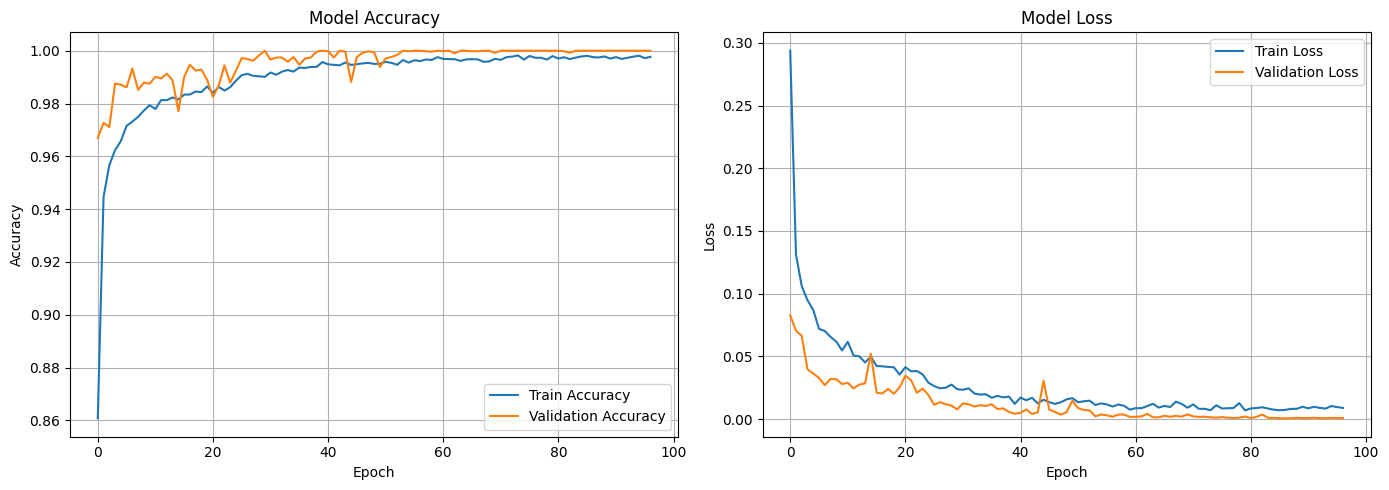

In [111]:
# Plotting Training vs Validation Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


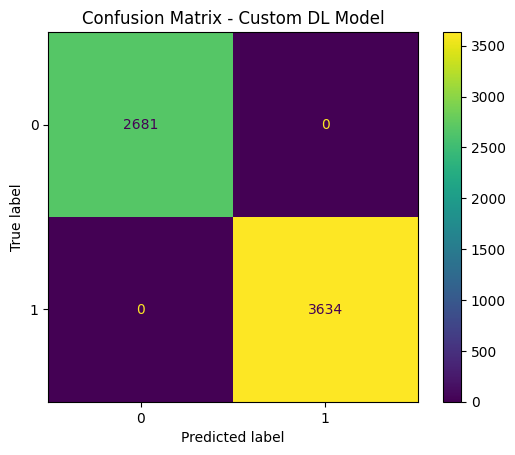

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, custom_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Custom DL Model")
plt.grid(False)
plt.show()
